In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score

In [2]:
# Load the train_data CSV file
train_data_path = 'Ecommerce/train_data.csv'
train_data = pd.read_csv(train_data_path)
train_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [3]:
# Load the val_data CSV file
val_data_path = 'Ecommerce/test_data.csv'
val_data = pd.read_csv(train_data_path)
val_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


# Convert reviews.text to Tf-Idf scores

In [4]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(train_data['reviews.text'])
tfidf_val = tfidf_vectorizer.fit_transform(val_data['reviews.text'])

# One hot encode Target Variable

In [5]:
# Expected: [0 1 2], got ['Negative' 'Neutral' 'Positive']
train_sentiment_encoded = pd.get_dummies(train_data['sentiment'])
val_sentiment_encoded = pd.get_dummies(val_data['sentiment'])

# Get the column index with the highest value for each row
reversed_sentiment_train = np.argmax(train_sentiment_encoded.values, axis=1)
reversed_sentiment_val = np.argmax(val_sentiment_encoded.values, axis=1)

# Train Models

## Multinomial Naive Bayes classifier

In [6]:
# Train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, reversed_sentiment_train)

MultinomialNB()

Epoch number 0 , training precision = 0.8784375625 , validation precision = 0.8784375625
Epoch number 1 , training precision = 0.8784375625 , validation precision = 0.8784375625
Epoch number 2 , training precision = 0.8784375625 , validation precision = 0.8784375625
Epoch number 3 , training precision = 0.8784375625 , validation precision = 0.8784375625
Epoch number 4 , training precision = 0.8784375625 , validation precision = 0.8784375625
Epoch number 5 , training precision = 0.8784375625 , validation precision = 0.8784375625
Epoch number 6 , training precision = 0.8784375625 , validation precision = 0.8784375625
Epoch number 7 , training precision = 0.8784375625 , validation precision = 0.8784375625
Epoch number 8 , training precision = 0.8784375625 , validation precision = 0.8784375625
Epoch number 9 , training precision = 0.8784375625 , validation precision = 0.8784375625


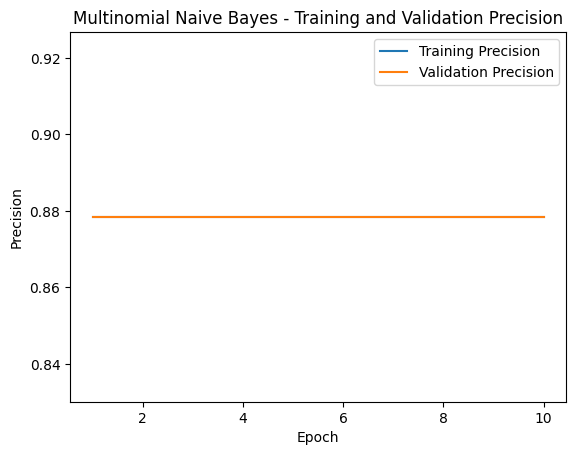

In [7]:
# Initialize lists to store precision scores
train_precision_list = []
val_precision_list = []

# Train the Multinomial Naive Bayes classifier for multiple epochs
num_epochs = 10
for epoch in range(num_epochs):

    # Get predictions on training and validation data
    train_predictions = nb_classifier.predict(tfidf_train)
    val_predictions = nb_classifier.predict(tfidf_val)

    # Calculate precision for training and validation data
    train_precision = precision_score(reversed_sentiment_train, train_predictions, average='weighted', zero_division=0)
    val_precision = precision_score(reversed_sentiment_val, val_predictions, average='weighted', zero_division=0)
    
    # print epoch results
    print(f"Epoch number {epoch} , training precision = {train_precision} , validation precision = {val_precision}")
    
    # Add precision scores to the lists
    train_precision_list.append(train_precision)
    val_precision_list.append(val_precision)

# Plot Multinomial Naive Bayes training and validation precision over epochs
plt.plot(range(1, num_epochs + 1), train_precision_list, label='Training Precision')
plt.plot(range(1, num_epochs + 1), val_precision_list, label='Validation Precision')
plt.legend()
plt.title('Multinomial Naive Bayes - Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.show()

## Random Forest Classifier

In [8]:
# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(tfidf_train, reversed_sentiment_train)

RandomForestClassifier(random_state=42)

Epoch number 0 , training precision = 0.9997500666666668 , validation precision = 0.9997500666666668
Epoch number 1 , training precision = 0.9997500666666668 , validation precision = 0.9997500666666668
Epoch number 2 , training precision = 0.9997500666666668 , validation precision = 0.9997500666666668
Epoch number 3 , training precision = 0.9997500666666668 , validation precision = 0.9997500666666668
Epoch number 4 , training precision = 0.9997500666666668 , validation precision = 0.9997500666666668
Epoch number 5 , training precision = 0.9997500666666668 , validation precision = 0.9997500666666668
Epoch number 6 , training precision = 0.9997500666666668 , validation precision = 0.9997500666666668
Epoch number 7 , training precision = 0.9997500666666668 , validation precision = 0.9997500666666668
Epoch number 8 , training precision = 0.9997500666666668 , validation precision = 0.9997500666666668
Epoch number 9 , training precision = 0.9997500666666668 , validation precision = 0.9997500

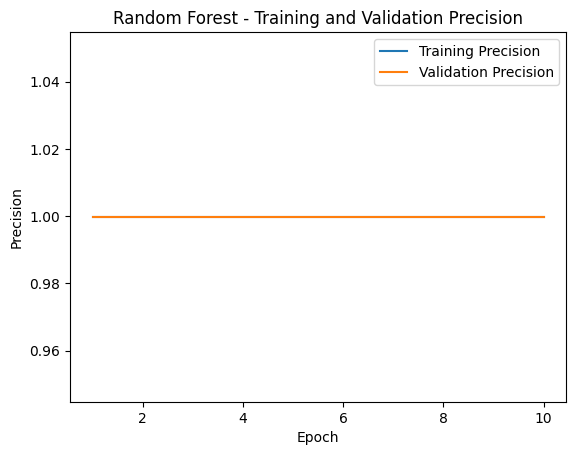

In [9]:
# Initialize lists to store precision scores
train_precision_list = []
val_precision_list = []

# Train the Random Forest Classifier for multiple epochs
num_epochs = 10
for epoch in range(num_epochs):

    # Get predictions on training and validation data
    train_predictions = rf_classifier.predict(tfidf_train)
    val_predictions = rf_classifier.predict(tfidf_val)

    # Calculate precision for training and validation data
    train_precision = precision_score(reversed_sentiment_train, train_predictions, average='weighted')
    val_precision = precision_score(reversed_sentiment_val, val_predictions, average='weighted')

    # print epoch results
    print(f"Epoch number {epoch} , training precision = {train_precision} , validation precision = {val_precision}")
    
    # Add precision scores to the lists
    train_precision_list.append(train_precision)
    val_precision_list.append(val_precision)

# Plot Random Forest training and validation precision over epochs
plt.plot(range(1, num_epochs + 1), train_precision_list, label='Training Precision')
plt.plot(range(1, num_epochs + 1), val_precision_list, label='Validation Precision')
plt.legend()
plt.title('Random Forest - Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.show()

## XGBoost Classifier

In [10]:
# Train the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(tfidf_train, reversed_sentiment_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Epoch number 0 , training precision = 0.9997500666666668 , validation precision = 0.9997500666666668
Epoch number 1 , training precision = 0.9997500666666668 , validation precision = 0.9997500666666668
Epoch number 2 , training precision = 0.9997500666666668 , validation precision = 0.9997500666666668
Epoch number 3 , training precision = 0.9997500666666668 , validation precision = 0.9997500666666668
Epoch number 4 , training precision = 0.9997500666666668 , validation precision = 0.9997500666666668
Epoch number 5 , training precision = 0.9997500666666668 , validation precision = 0.9997500666666668
Epoch number 6 , training precision = 0.9997500666666668 , validation precision = 0.9997500666666668
Epoch number 7 , training precision = 0.9997500666666668 , validation precision = 0.9997500666666668
Epoch number 8 , training precision = 0.9997500666666668 , validation precision = 0.9997500666666668
Epoch number 9 , training precision = 0.9997500666666668 , validation precision = 0.9997500

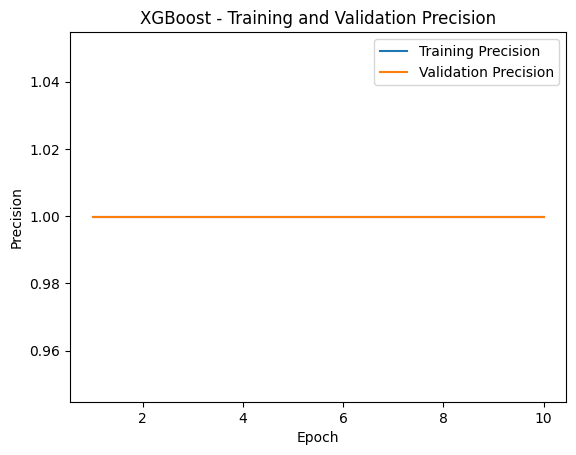

In [11]:
# Initialize lists to store precision scores
train_precision_list = []
val_precision_list = []

# Train the XGBoost Classifier for multiple epochs
num_epochs = 10
for epoch in range(num_epochs):

    # Get predictions on training and validation data
    train_predictions = xgb_classifier.predict(tfidf_train)
    val_predictions = xgb_classifier.predict(tfidf_val)

    # Calculate precision for training and validation data
    train_precision = precision_score(reversed_sentiment_train, train_predictions, average='weighted')
    val_precision = precision_score(reversed_sentiment_val, val_predictions, average='weighted')

    # print epoch results
    print(f"Epoch number {epoch} , training precision = {train_precision} , validation precision = {val_precision}")
    
    # Add precision scores to the lists
    train_precision_list.append(train_precision)
    val_precision_list.append(val_precision)

# Plot XGBoost training and validation precision over epochs
plt.plot(range(1, num_epochs + 1), train_precision_list, label='Training Precision')
plt.plot(range(1, num_epochs + 1), val_precision_list, label='Validation Precision')
plt.legend()
plt.title('XGBoost - Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.show()

# Validation Evaluation Metrics

In [12]:
# Use the predict() method to get the predicted labels for the test data
nb_pred = nb_classifier.predict(tfidf_val)
rf_pred = rf_classifier.predict(tfidf_val)
xgb_pred = xgb_classifier.predict(tfidf_val)


In [13]:
nb_pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [14]:
rf_pred

array([2, 2, 1, ..., 2, 2, 2], dtype=int64)

In [15]:
xgb_pred

array([2, 2, 1, ..., 2, 2, 2], dtype=int64)

In [16]:
# Set zero_division=0 to handle the warning
zero_division_value = 0

# Print the classification report for each classifier
print("Multinomial Naive Bayes Classifier Report:")
print(classification_report(reversed_sentiment_val, nb_pred, zero_division=zero_division_value))

print("Random Forest Classifier Report:")
print(classification_report(reversed_sentiment_val, rf_pred, zero_division=zero_division_value))

print("XGBoost Classifier Report:")
print(classification_report(reversed_sentiment_val, xgb_pred, zero_division=zero_division_value))

Multinomial Naive Bayes Classifier Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.00      0.00      0.00       158
           2       0.94      1.00      0.97      3749

    accuracy                           0.94      4000
   macro avg       0.31      0.33      0.32      4000
weighted avg       0.88      0.94      0.91      4000

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      0.99      1.00       158
           2       1.00      1.00      1.00      3749

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

XGBoost Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00   

# Save models and Vectorizer

In [17]:
import pickle

# Save the trained models to files
nb_model_path = 'nb_model.pkl'
rf_model_path = 'rf_model.pkl'
xgb_model_path = 'xgb_model.pkl'
pickle.dump(nb_classifier, open(nb_model_path, 'wb'))
pickle.dump(rf_classifier, open(rf_model_path, 'wb'))
pickle.dump(xgb_classifier, open(xgb_model_path, 'wb'))

# Save the TfidfVectorizer
tfidf_vectorizer_path = 'tfidf_vectorizer.pkl'
pickle.dump(tfidf_vectorizer, open(tfidf_vectorizer_path, 'wb'))

# Load the saved models and TfidfVectorizer

In [18]:
# Load the test_data CSV file
test_data_path = 'Ecommerce/test_data_hidden.csv'
test_data = pd.read_csv(train_data_path)
test_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [19]:
# Load the saved models and TfidfVectorizer
loaded_nb_classifier = pickle.load(open(nb_model_path, 'rb'))
loaded_rf_classifier = pickle.load(open(rf_model_path, 'rb'))
loaded_xgb_classifier = pickle.load(open(xgb_model_path, 'rb'))
loaded_tfidf_vectorizer = pickle.load(open(tfidf_vectorizer_path, 'rb'))

# Testing Evaluation Metrics

In [20]:
# Expected: [0 1 2], got ['Negative' 'Neutral' 'Positive']
test_sentiment_encoded = pd.get_dummies(test_data['sentiment'])

# Get the column index with the highest value for each row
reversed_sentiment_test = np.argmax(test_sentiment_encoded.values, axis=1)

In [21]:
# Use the model to make predictions on the test data
tfidf_test_loaded = loaded_tfidf_vectorizer.transform(test_data['reviews.text'])
y_pred_nb = loaded_nb_classifier.predict(tfidf_test_loaded)
y_pred_rf = loaded_rf_classifier.predict(tfidf_test_loaded)
y_pred_xgb = loaded_xgb_classifier.predict(tfidf_test_loaded)

In [22]:
# Set zero_division=0 to handle the warning
zero_division_value = 0

# Print the classification report for each classifier
print("Multinomial Naive Bayes Classifier Report:")
print(classification_report(reversed_sentiment_test, y_pred_nb, zero_division=zero_division_value))

print("Random Forest Classifier Report:")
print(classification_report(reversed_sentiment_test, y_pred_rf, zero_division=zero_division_value))

print("XGBoost Classifier Report:")
print(classification_report(reversed_sentiment_test, y_pred_xgb, zero_division=zero_division_value))

Multinomial Naive Bayes Classifier Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.00      0.00      0.00       158
           2       0.94      1.00      0.97      3749

    accuracy                           0.94      4000
   macro avg       0.31      0.33      0.32      4000
weighted avg       0.88      0.94      0.91      4000

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      0.99      1.00       158
           2       1.00      1.00      1.00      3749

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

XGBoost Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00   

# confusion matrix for each classifier

In [24]:
# Create the confusion matrix for each classifier
conf_mat_nb = confusion_matrix(reversed_sentiment_test, y_pred_nb)
conf_mat_rf = confusion_matrix(reversed_sentiment_test, y_pred_rf)
conf_mat_xgb = confusion_matrix(reversed_sentiment_test, y_pred_xgb)

# Plot the confusion matrix for each classifier
class_names = ['Positive', 'Negative', 'Neutral']

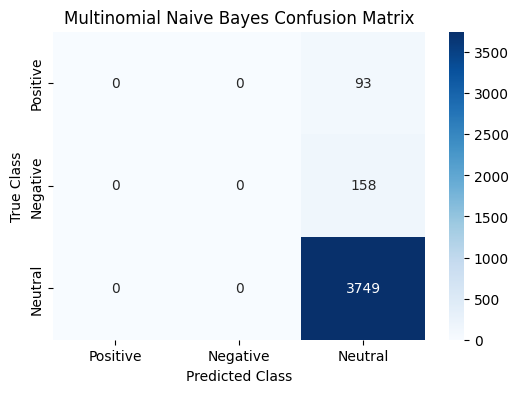

In [25]:
# Multinomial Naive Bayes Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_nb, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

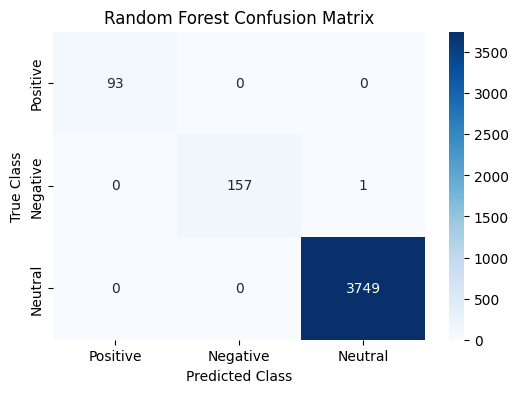

In [26]:
# Random Forest Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

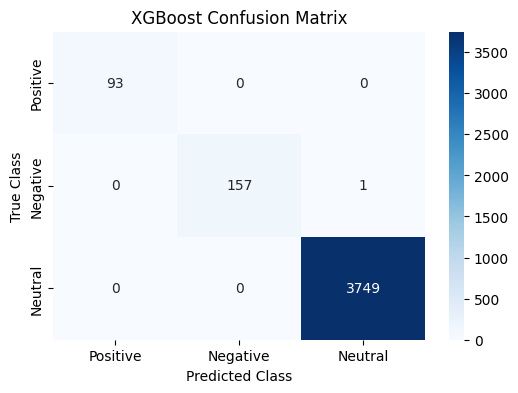

In [27]:
# XGBoost Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()